In [1]:
# Use Braket SDK Cost Tracking to estimate the cost to run this example
from braket.tracking import Tracker

t = Tracker().start()

In [2]:
# general imports
import matplotlib.pyplot as plt

# magic word for producing visualizations in notebook
%matplotlib inline
import numpy as np

from braket.aws import AwsDevice

# AWS imports: Import Braket SDK modules
from braket.circuits import Circuit
from braket.circuits.observables import Z
from braket.devices import Devices, LocalSimulator

In [3]:
# general imports
import matplotlib.pyplot as plt

# magic word for producing visualizations in notebook
%matplotlib inline
import numpy as np

from braket.aws import AwsDevice

# AWS imports: Import Braket SDK modules
from braket.circuits import Circuit
from braket.circuits.observables import Z
from braket.devices import Devices, LocalSimulator

In [5]:
# function to build a GHZ state
def ghz_circuit(n_qubits):
    """Function to return a GHZ circuit ansatz
    input: number of qubits
    """
    # instantiate circuit object
    circuit = Circuit()

    # add Hadamard gate on first qubit
    circuit.h(0)

    # apply series of CNOT gates
    for ii in range(n_qubits - 1):
        circuit.cnot(control=ii, target=ii + 1)

    return circuit

In [6]:
# define circuit
n_qubits = 10
ghz = ghz_circuit(n_qubits)

In [7]:
# print circuit
print(ghz)

T  : │  0  │  1  │  2  │  3  │  4  │  5  │  6  │  7  │  8  │  9  │
      ┌───┐                                                       
q0 : ─┤ H ├───●───────────────────────────────────────────────────
      └───┘   │                                                   
            ┌─┴─┐                                                 
q1 : ───────┤ X ├───●─────────────────────────────────────────────
            └───┘   │                                             
                  ┌─┴─┐                                           
q2 : ─────────────┤ X ├───●───────────────────────────────────────
                  └───┘   │                                       
                        ┌─┴─┐                                     
q3 : ───────────────────┤ X ├───●─────────────────────────────────
                        └───┘   │                                 
                              ┌─┴─┐                               
q4 : ─────────────────────────┤ X ├───●───────────────────────

In [8]:
# set up device: Local Simulator
device = LocalSimulator()

In [9]:
# run circuit
result = device.run(ghz, shots=1000).result()
# get measurement shots
counts = result.measurement_counts
# print counts
print(counts)

Counter({'0000000000': 526, '1111111111': 474})


Text(0, 0.5, 'counts')

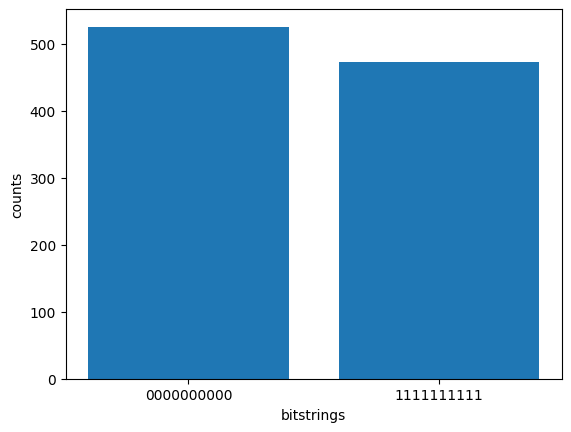

In [10]:
# plot using Counter
plt.bar(counts.keys(), counts.values())
plt.xlabel("bitstrings")
plt.ylabel("counts")